In [5]:
import pandas as pd 
import numpy as np
iris_data = pd.read_csv('data/iris_data.csv', decimal=',')
iris_data.head()

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,I. setosa
1,4.9,3.0,1.4,0.2,I. setosa
2,4.7,3.2,1.3,0.2,I. setosa
3,4.6,3.1,1.5,0.2,I. setosa
4,5.0,3.6,1.4,0.2,I. setosa


In [6]:
iris_data.drop(['Petal length','Petal width'],'columns',inplace=True)

In [11]:
# Round to 1
iris_data.round({'Sepal length': 1, 'Sepal width': 1})

,Sepal length,Sepal width,Species
0,5.1,3.5,I. setosa
1,4.9,3.0,I. setosa
2,4.7,3.2,I. setosa
3,4.6,3.1,I. setosa
4,5.0,3.6,I. setosa
...,...,...,...
145,6.7,3.0,I. virginica
146,6.3,2.5,I. virginica
147,6.5,3.0,I. virginica
148,6.2,3.4,I. virginica


In [12]:
# Round to 0
iris_data.round(0)

,Sepal length,Sepal width,Species
0,5.0,4.0,I. setosa
1,5.0,3.0,I. setosa
2,5.0,3.0,I. setosa
3,5.0,3.0,I. setosa
4,5.0,4.0,I. setosa
...,...,...,...
145,7.0,3.0,I. virginica
146,6.0,2.0,I. virginica
147,6.0,3.0,I. virginica
148,6.0,3.0,I. virginica


In [13]:
iris_data.head()

,Sepal length,Sepal width,Species
0,5.1,3.5,I. setosa
1,4.9,3.0,I. setosa
2,4.7,3.2,I. setosa
3,4.6,3.1,I. setosa
4,5.0,3.6,I. setosa


In [15]:
setosaSet = (iris_data.loc[(iris_data['Species'] == 'I. setosa')]).reset_index()

In [18]:
setosaSet.head()

,index,Sepal length,Sepal width,Species
0,0,5.1,3.5,I. setosa
1,1,4.9,3.0,I. setosa
2,2,4.7,3.2,I. setosa
3,3,4.6,3.1,I. setosa
4,4,5.0,3.6,I. setosa


In [19]:
virginicaSet = (iris_data.loc[(iris_data['Species'] == 'I. virginica')]).reset_index()

In [20]:
virginicaSet.head()

,index,Sepal length,Sepal width,Species
0,100,6.3,3.3,I. virginica
1,101,5.8,2.7,I. virginica
2,102,7.1,3.0,I. virginica
3,103,6.3,2.9,I. virginica
4,104,6.5,3.0,I. virginica


In [21]:
versicolorSet = (iris_data.loc[(iris_data['Species'] == 'I. versicolor')]).reset_index()

In [22]:
versicolorSet.head()

,index,Sepal length,Sepal width,Species
0,50,7.0,3.2,I. versicolor
1,51,6.4,3.2,I. versicolor
2,52,6.9,3.1,I. versicolor
3,53,5.5,2.3,I. versicolor
4,54,6.5,2.8,I. versicolor


In [23]:
%pylab inline 
from sklearn.cluster import MeanShift, estimate_bandwidth

Populating the interactive namespace from numpy and matplotlib


In [24]:
def mean_shift(data, n_samples=1000):
    bandwidth = estimate_bandwidth(data, quantile=0.2, 
                                   n_samples=n_samples)

    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(data)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_

    labels_unique = np.unique(labels)
    n_clusters = len(labels_unique)

    print('Number of estimated clusters : {}'.format(n_clusters))
    
    return labels, cluster_centers, n_clusters

In [36]:
versicolorSimple = versicolorSet[["Sepal length", "Sepal width"]]

In [37]:
versicolorSimple

,Sepal length,Sepal width
0,7.0,3.2
1,6.4,3.2
2,6.9,3.1
3,5.5,2.3
4,6.5,2.8
5,5.7,2.8
6,6.3,3.3
7,4.9,2.4
8,6.6,2.9
9,5.2,2.7


In [38]:
bandwidth = estimate_bandwidth(versicolorSimple, quantile=0.2)

In [39]:
bandwidth

0.38288774358852407

In [44]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)

In [45]:
ms

MeanShift(bandwidth=0.38288774358852407, bin_seeding=True, cluster_all=True,
          max_iter=300, min_bin_freq=1, n_jobs=None, seeds=None)

In [46]:
 ms.fit(versicolorSimple)

MeanShift(bandwidth=0.38288774358852407, bin_seeding=True, cluster_all=True,
          max_iter=300, min_bin_freq=1, n_jobs=None, seeds=None)

In [47]:
labels = ms.labels_

In [48]:
labels

array([1, 1, 1, 3, 1, 0, 1, 3, 1, 3, 3, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0,
       2, 0, 1, 1, 1, 1, 0, 0, 3, 3, 0, 0, 0, 0, 1, 2, 0, 3, 0, 0, 0, 3,
       0, 0, 0, 0, 3, 0])

In [49]:
labels_unique = np.unique(labels)

In [50]:
labels_unique

array([0, 1, 2, 3])

In [51]:
n_clusters = len(labels_unique)

In [52]:
n_clusters

4

In [77]:
# All flowers
data = iris_data[["Sepal length", "Sepal width"]]

In [78]:
data

,Sepal length,Sepal width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [80]:
nympy_data = data.to_numpy()

In [81]:
nympy_data

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [82]:
# All flowers
labels, cluster_centers, n_clusters = mean_shift(nympy_data)

Number of estimated clusters : 3


In [83]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [84]:
cluster_centers

array([[6.08727273, 2.90181818],
       [5.        , 3.37692308],
       [7.6       , 3.73333333]])

In [85]:
n_clusters

3

In [86]:
%matplotlib notebook
# 2D data generated and meanshift used to find labels, cluster centers and amount of clusters
from itertools import cycle
from sklearn.datasets import make_blobs

<IPython.core.display.Javascript object>


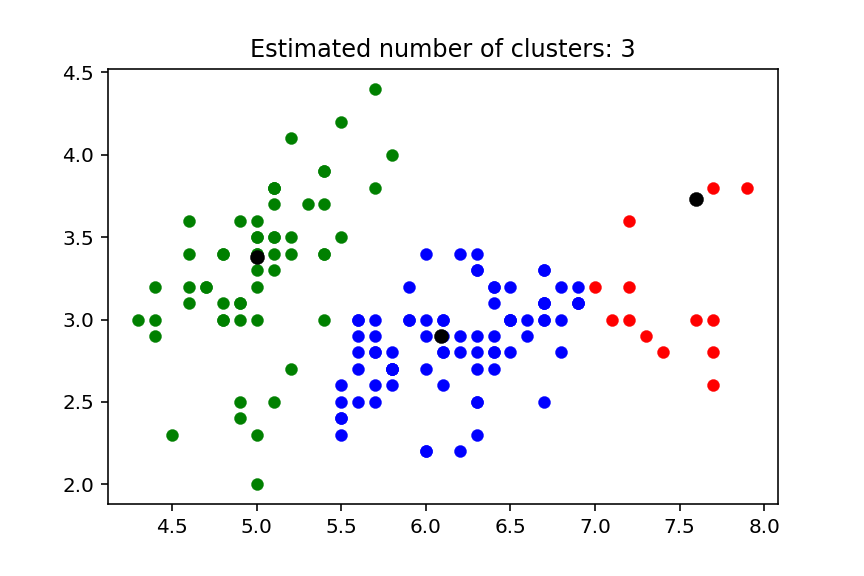

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True  True  True  True  True  True False  True False
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True False  True  True
  True  True False  True  True  True False  True  True False False False
  True False  True  True  True  True  True  True  True False False  True
  True  True False  True  True False  True  True  True False False False
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
[6.08727273 2.90181818]
[6.4 6.9 5.5 6.5 5.7 6.3 6.6 5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5

Text(0.5, 1.0, 'Estimated number of clusters: 3')

In [92]:
# Plot the clusters in different colors
fig = plt.figure()
ax = fig.add_subplot(111)

colors = cycle('bgrcmy')
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    print(my_members)
    cluster_center = cluster_centers[k]
    print(cluster_center)
    
    x, y = nympy_data[my_members,0], nympy_data[my_members,1]
    print(x)
    print(y)
    ax.scatter(x, y, c=col, linewidth=0.2)
    ax.scatter(cluster_center[0], cluster_center[1], c='k', s=50, linewidth=0.2)
    
plt.title('Estimated number of clusters: {}'.format(n_clusters))

In [96]:
# quantile 1.5
def mean_shift_quatile(data, n_samples=1000):
    bandwidth = estimate_bandwidth(data, quantile=0.15, 
                                   n_samples=n_samples)

    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(data)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_

    labels_unique = np.unique(labels)
    n_clusters = len(labels_unique)

    print('Number of estimated clusters : {}'.format(n_clusters))
    
    return labels, cluster_centers, n_clusters

In [97]:
labels, cluster_centers, n_clusters = mean_shift_quatile(nympy_data)

Number of estimated clusters : 6


<IPython.core.display.Javascript object>


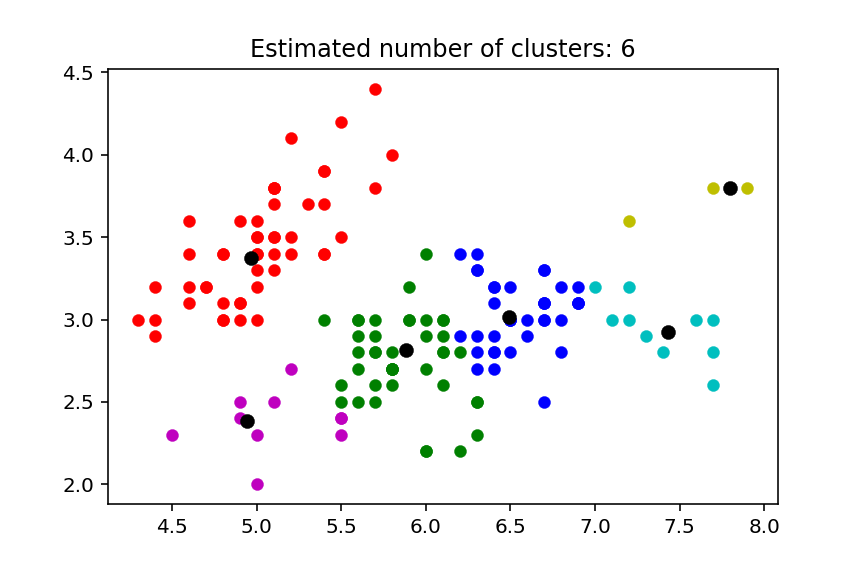

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True  True False  True False  True False  True False
 False False False False False  True False False False False False False
 False False  True  True  True  True False False False False False False
 False False  True False False False False False False False False False
 False  True False False  True False False  True  True False False False
  True False  True  True  True False False  True  True False False False
  True False False  True  True False False False  True False False False
  True  True False False  True  True False  True  True  True False  True
  True  True False  True  True False]
[6.4902439  3.01463415]
[6.4 6.9 6.5 6.3 6.6 6.7 6.4 6.6 6.8 6.7 6.7 6.2 6.3 6.3 6.5 6

Text(0.5, 1.0, 'Estimated number of clusters: 6')

In [98]:
# Plot the clusters in different colors
fig = plt.figure()
ax = fig.add_subplot(111)

colors = cycle('bgrcmy')
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    print(my_members)
    cluster_center = cluster_centers[k]
    print(cluster_center)
    
    x, y = nympy_data[my_members,0], nympy_data[my_members,1]
    print(x)
    print(y)
    ax.scatter(x, y, c=col, linewidth=0.2)
    ax.scatter(cluster_center[0], cluster_center[1], c='k', s=50, linewidth=0.2)
    
plt.title('Estimated number of clusters: {}'.format(n_clusters))

In [99]:
# Normal plot

In [102]:
normalData = data.to_numpy()

In [103]:
normalData

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [106]:
def mean_shift_normal(data, n_samples=1000):
    bandwidth = estimate_bandwidth(data, n_samples=n_samples)

    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(data)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_

    labels_unique = np.unique(labels)
    n_clusters = len(labels_unique)

    print('Number of estimated clusters : {}'.format(n_clusters))
    
    return labels, cluster_centers, n_clusters

In [107]:
labels, cluster_centers, n_clusters = mean_shift_normal(normalData)

Number of estimated clusters : 2


<IPython.core.display.Javascript object>


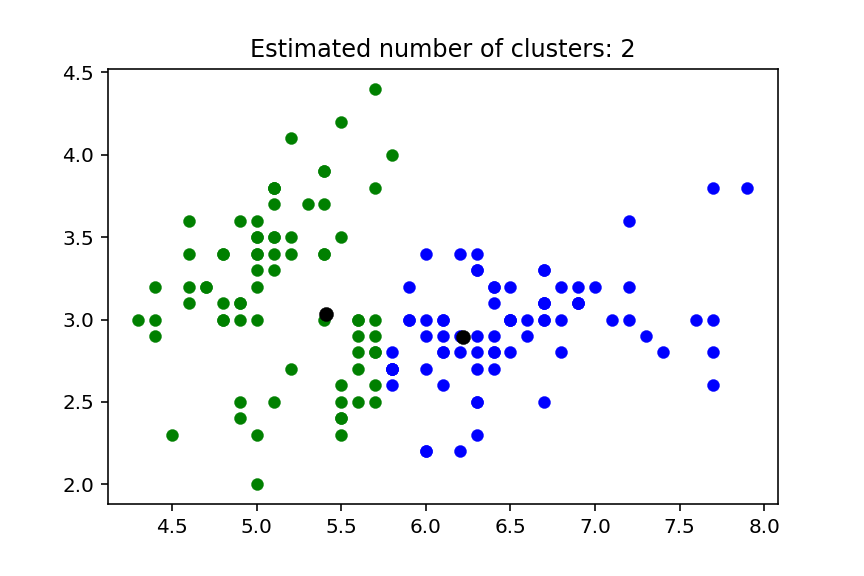

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True  True False  True False  True False  True False
 False  True  True  True False  True False  True  True False  True  True
  True  True  True  True  True  True  True False False False  True  True
 False  True  True  True False False False  True  True False False False
 False  True False False  True  True  True  True  True  True False  True
  True  True  True  True  True False  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
[6.22  2.892]
[7.  6.4 6.9 6.5 6.3 6.6 5.9 6.  6.1 6.7 5.8 6.2 5.9 6.1 6.3 6.1 6.4 6.6

Text(0.5, 1.0, 'Estimated number of clusters: 2')

In [108]:
# Plot the clusters in different colors
fig = plt.figure()
ax = fig.add_subplot(111)

colors = cycle('bgrcmy')
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    print(my_members)
    cluster_center = cluster_centers[k]
    print(cluster_center)
    
    x, y = normalData[my_members,0], normalData[my_members,1]
    print(x)
    print(y)
    ax.scatter(x, y, c=col, linewidth=0.2)
    ax.scatter(cluster_center[0], cluster_center[1], c='k', s=50, linewidth=0.2)
    
plt.title('Estimated number of clusters: {}'.format(n_clusters))

## Stat opgave

###### https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=101%2C851%2C751%2C461&K%C3%98N=1%2C2&CIVILSTAND=U%2CG%2CE%2CF&Tid=2020K4%2C2019K4%2C2018K4%2C2017K4%2C2016K4&ALDER=30%2C31%2C32%2C33%2C34%2C35%2C36%2C37%2C38%2C39%2C40


<br>
<br>

In [109]:
import requests

# url = 'http://api.worldbank.org/v2/en/country/DNK;URY' 
# response = requests.get(url, params={'downloadformat': 'csv'})
url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMRÅDE=101%2C851%2C751%2C461&KØN=1%2C2&CIVILSTAND=U%2CG%2CE%2CF&Tid=2020K4%2C2019K4%2C2018K4%2C2017K4%2C2016K4&ALDER=30%2C31%2C32%2C33%2C34%2C35%2C36%2C37%2C38%2C39%2C40'
response = requests.get(url)

print(response.headers)

{'Cache-Control': 'no-cache', 'Pragma': 'no-cache', 'Transfer-Encoding': 'chunked', 'Content-Type': 'text/csv; charset=utf-8', 'Expires': '-1', 'Server': 'Microsoft-IIS/10.0', 'StatbankAPI-Request-Id': '4cceb82b-5ce7-4694-84d8-7ed5bd4bd35a', 'Access-Control-Expose-Headers': 'StatbankAPI-Request-Id', 'Content-Disposition': 'attachment; filename=FOLK1A.csv', 'X-AspNet-Version': '4.0.30319', 'X-Powered-By': 'ASP.NET', 'Date': 'Sun, 31 Oct 2021 18:13:01 GMT'}


In [110]:
# get the filename
fname = response.headers['Content-Disposition'].split('=')[1]
fname = 'data/week_9_'+fname
# write content to file (zip file writing bytes)
if response.ok:  # status_code == 200:
    with open(fname, 'wb') as f:
        f.write(response.content)   
print('-----------------')
print('Downloaded {}'.format(fname))

-----------------
Downloaded data/week_9_FOLK1A.csv


In [111]:
%%bash
head ./data/week_9_FOLK1A.csv

﻿OMRÅDE;KØN;CIVILSTAND;TID;ALDER;INDHOLD
København;Mænd;Ugift;2016K4;30 år;6033
København;Mænd;Ugift;2016K4;31 år;5250
København;Mænd;Ugift;2016K4;32 år;4648
København;Mænd;Ugift;2016K4;33 år;4116
København;Mænd;Ugift;2016K4;34 år;3611
København;Mænd;Ugift;2016K4;35 år;3396
København;Mænd;Ugift;2016K4;36 år;3249
København;Mænd;Ugift;2016K4;37 år;2973
København;Mænd;Ugift;2016K4;38 år;2634


In [117]:
data_file = './data/week_9_FOLK1A.csv'
df = pd.read_csv(data_file,sep=';', encoding='utf-8')
df['TID'] = df['TID'].map(lambda x:x[:-2]) #cut the last 2 characters
df['ALDER'] = df['ALDER'].map(lambda x:x[:-3]) #cut the last 3 characters
df.to_csv('./data/week_9_FOLK1A_cleaned.csv',header=True, index=False)

In [118]:
df.head()

,OMRÅDE,KØN,CIVILSTAND,TID,ALDER,INDHOLD
0,København,Mænd,Ugift,2016,30,6033
1,København,Mænd,Ugift,2016,31,5250
2,København,Mænd,Ugift,2016,32,4648
3,København,Mænd,Ugift,2016,33,4116
4,København,Mænd,Ugift,2016,34,3611


In [119]:
from sklearn import preprocessing
# Convert gender to 0 or 1
label_enc =preprocessing.LabelEncoder()
df['KØN'] = label_enc.fit_transform(df['KØN'].astype(str))
df.head()

,OMRÅDE,KØN,CIVILSTAND,TID,ALDER,INDHOLD
0,København,1,Ugift,2016,30,6033
1,København,1,Ugift,2016,31,5250
2,København,1,Ugift,2016,32,4648
3,København,1,Ugift,2016,33,4116
4,København,1,Ugift,2016,34,3611


In [115]:
# Man kan ændre områder til 1, 2, 3, 
# df['OMRÅDE'] = label_enc.fit_transform(df['OMRÅDE'].astype(str))
# df.head()

,OMRÅDE,KØN,CIVILSTAND,TID,ALDER,INDHOLD
0,2,1,Ugift,2016,30,6033
1,2,1,Ugift,2016,31,5250
2,2,1,Ugift,2016,32,4648
3,2,1,Ugift,2016,33,4116
4,2,1,Ugift,2016,34,3611


In [116]:
# df

,OMRÅDE,KØN,CIVILSTAND,TID,ALDER,INDHOLD
0,2,1,Ugift,2016,30,6033
1,2,1,Ugift,2016,31,5250
2,2,1,Ugift,2016,32,4648
3,2,1,Ugift,2016,33,4116
4,2,1,Ugift,2016,34,3611
...,...,...,...,...,...,...
1755,3,0,Fraskilt,2020,36,98
1756,3,0,Fraskilt,2020,37,121
1757,3,0,Fraskilt,2020,38,110
1758,3,0,Fraskilt,2020,39,115


In [120]:
# One-hot encoding of 'Embarked' with pd.get_dummies
df = pd.get_dummies(df,columns=['OMRÅDE'])
df.head()

,KØN,CIVILSTAND,TID,ALDER,INDHOLD,OMRÅDE_Aalborg,OMRÅDE_Aarhus,OMRÅDE_København,OMRÅDE_Odense
0,1,Ugift,2016,30,6033,0,0,1,0
1,1,Ugift,2016,31,5250,0,0,1,0
2,1,Ugift,2016,32,4648,0,0,1,0
3,1,Ugift,2016,33,4116,0,0,1,0
4,1,Ugift,2016,34,3611,0,0,1,0


In [121]:
# One-hot encoding of 'Embarked' with pd.get_dummies
df = pd.get_dummies(df,columns=['CIVILSTAND'])
df.head()

,KØN,TID,ALDER,INDHOLD,OMRÅDE_Aalborg,OMRÅDE_Aarhus,OMRÅDE_København,OMRÅDE_Odense,CIVILSTAND_Enke/enkemand,CIVILSTAND_Fraskilt,CIVILSTAND_Gift/separeret,CIVILSTAND_Ugift
0,1,2016,30,6033,0,0,1,0,0,0,0,1
1,1,2016,31,5250,0,0,1,0,0,0,0,1
2,1,2016,32,4648,0,0,1,0,0,0,0,1
3,1,2016,33,4116,0,0,1,0,0,0,0,1
4,1,2016,34,3611,0,0,1,0,0,0,0,1


In [122]:
# Find missing values in the data and drop those rows:
print('rows before drop n/a',len(df))
bool_matrix = df.isnull() # dataframe with True and False values for each cell in the titanic_data
only_null_filter = bool_matrix.any(axis=1) # is there a True value in any column in each row. returns a pandas Series with index matching index of titcanic dataframe
missing = df[only_null_filter] # show all rows that has one or more null values
df = df.dropna()
print('rows after',len(df))
df
pd.options.display.max_rows = None # let me see all rows in the dataframe (can be used with columns too)
bool_matrix

rows before drop n/a 1760
rows after 1760


,KØN,TID,ALDER,INDHOLD,OMRÅDE_Aalborg,OMRÅDE_Aarhus,OMRÅDE_København,OMRÅDE_Odense,CIVILSTAND_Enke/enkemand,CIVILSTAND_Fraskilt,CIVILSTAND_Gift/separeret,CIVILSTAND_Ugift
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


In [123]:
only_null_filter

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [124]:
# what is the best bandwidth to use for our dataset?
# The smaller values of bandwith result in tall skinny kernels & larger values result in short fat kernels.
from sklearn.cluster import estimate_bandwidth
bw = estimate_bandwidth(df)

In [125]:
from sklearn.cluster import MeanShift
analyzer = MeanShift(bandwidth=bw) 
analyzer.fit(df)

MeanShift(bandwidth=455.09201046994133, bin_seeding=False, cluster_all=True,
          max_iter=300, min_bin_freq=1, n_jobs=None, seeds=None)

In [126]:
labels = analyzer.labels_
print(labels)
print('\n\n',np.unique(labels))

[6 5 4 ... 0 0 0]


 [0 1 2 3 4 5 6]


#### 7 closters in above model

In [128]:
#We will add a new column in dataset which shows the cluster the data of a particular row belongs to.

# create a new column in the dataset
df['cluster_group'] = np.nan
for i in range(len(df)): # loop 714 rows
    df.iloc[i,df.columns.get_loc('cluster_group')] = labels[i] #set the cluster label on each row

df.head()

,KØN,TID,ALDER,INDHOLD,OMRÅDE_Aalborg,OMRÅDE_Aarhus,OMRÅDE_København,OMRÅDE_Odense,CIVILSTAND_Enke/enkemand,CIVILSTAND_Fraskilt,CIVILSTAND_Gift/separeret,CIVILSTAND_Ugift,cluster_group
0,1,2016,30,6033,0,0,1,0,0,0,0,1,6.0
1,1,2016,31,5250,0,0,1,0,0,0,0,1,5.0
2,1,2016,32,4648,0,0,1,0,0,0,0,1,4.0
3,1,2016,33,4116,0,0,1,0,0,0,0,1,3.0
4,1,2016,34,3611,0,0,1,0,0,0,0,1,2.0


In [129]:
df.describe()

,KØN,INDHOLD,OMRÅDE_Aalborg,OMRÅDE_Aarhus,OMRÅDE_København,OMRÅDE_Odense,CIVILSTAND_Enke/enkemand,CIVILSTAND_Fraskilt,CIVILSTAND_Gift/separeret,CIVILSTAND_Ugift,cluster_group
count,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000
mean,0.500000,648.115909,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.263636
std,0.500142,977.576134,0.433136,0.433136,0.433136,0.433136,0.433136,0.433136,0.433136,0.433136,0.769543
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,357.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,802.000000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.000000
max,1.000000,6893.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


In [130]:
#Grouping by Cluster
df_cluster_data = df.groupby(['cluster_group']).mean()
#Count of people in each cluster
df_cluster_data['Counts'] = pd.Series(df.groupby(['cluster_group']).size())
df_cluster_data

,KØN,INDHOLD,OMRÅDE_Aalborg,OMRÅDE_Aarhus,OMRÅDE_København,OMRÅDE_Odense,CIVILSTAND_Enke/enkemand,CIVILSTAND_Fraskilt,CIVILSTAND_Gift/separeret,CIVILSTAND_Ugift,Counts
cluster_group,,,,,,,,,,,
0.0,0.492445,292.019231,0.294643,0.256868,0.151099,0.297390,0.302198,0.302198,0.221841,0.173764,1456
1.0,0.523207,1788.160338,0.046414,0.278481,0.645570,0.029536,0.000000,0.000000,0.493671,0.506329,237
2.0,0.580645,3347.225806,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,31
3.0,0.625000,4261.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8
4.0,0.500000,4808.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10
5.0,0.571429,5395.571429,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7
6.0,0.636364,6182.181818,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11


## Quantile = 0.2

In [131]:
bw = estimate_bandwidth(df, quantile=0.2)

In [132]:
analyzer = MeanShift(bandwidth=bw) 
analyzer.fit(df)

MeanShift(bandwidth=358.74313831423945, bin_seeding=False, cluster_all=True,
          max_iter=300, min_bin_freq=1, n_jobs=None, seeds=None)

In [133]:
labels = analyzer.labels_
print(labels)
print('\n\n',np.unique(labels))

[7 5 4 ... 0 0 0]


 [0 1 2 3 4 5 6 7 8]


#### 9 closters in above model

In [135]:
#We will add a new column in dataset which shows the cluster the data of a particular row belongs to.

# create a new column in the dataset
df['cluster_group'] = np.nan
for i in range(len(df)): # loop 714 rows
    df.iloc[i,df.columns.get_loc('cluster_group')] = labels[i] #set the cluster label on each row

df.head()

,KØN,TID,ALDER,INDHOLD,OMRÅDE_Aalborg,OMRÅDE_Aarhus,OMRÅDE_København,OMRÅDE_Odense,CIVILSTAND_Enke/enkemand,CIVILSTAND_Fraskilt,CIVILSTAND_Gift/separeret,CIVILSTAND_Ugift,cluster_group
0,1,2016,30,6033,0,0,1,0,0,0,0,1,7.0
1,1,2016,31,5250,0,0,1,0,0,0,0,1,5.0
2,1,2016,32,4648,0,0,1,0,0,0,0,1,4.0
3,1,2016,33,4116,0,0,1,0,0,0,0,1,3.0
4,1,2016,34,3611,0,0,1,0,0,0,0,1,3.0


In [136]:
df.describe()

,KØN,INDHOLD,OMRÅDE_Aalborg,OMRÅDE_Aarhus,OMRÅDE_København,OMRÅDE_Odense,CIVILSTAND_Enke/enkemand,CIVILSTAND_Fraskilt,CIVILSTAND_Gift/separeret,CIVILSTAND_Ugift,cluster_group
count,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.00000
mean,0.500000,648.115909,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.30000
std,0.500142,977.576134,0.433136,0.433136,0.433136,0.433136,0.433136,0.433136,0.433136,0.433136,0.89519
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.500000,357.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,802.000000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.00000
max,1.000000,6893.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.00000


In [137]:
#Grouping by Cluster
df_cluster_data = df.groupby(['cluster_group']).mean()
#Count of people in each cluster
df_cluster_data['Counts'] = pd.Series(df.groupby(['cluster_group']).size())
df_cluster_data

,KØN,INDHOLD,OMRÅDE_Aalborg,OMRÅDE_Aarhus,OMRÅDE_København,OMRÅDE_Odense,CIVILSTAND_Enke/enkemand,CIVILSTAND_Fraskilt,CIVILSTAND_Gift/separeret,CIVILSTAND_Ugift,Counts
cluster_group,,,,,,,,,,,
0.0,0.493750,284.009722,0.296528,0.252083,0.152778,0.298611,0.305556,0.305556,0.218056,0.170833,1440
1.0,0.512397,1696.107438,0.053719,0.314050,0.590909,0.041322,0.000000,0.000000,0.520661,0.479339,242
2.0,0.588235,3023.176471,0.000000,0.029412,0.970588,0.000000,0.000000,0.000000,0.000000,1.000000,34
3.0,0.545455,3894.727273,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11
4.0,0.625000,4450.125000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8
5.0,0.555556,4971.111111,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9
6.0,0.428571,5530.285714,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7
7.0,0.666667,6097.833333,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6
8.0,0.666667,6660.666667,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3
